# Homework 1
### Introduction to Data Science EN.553.436/EN.553.636 - Fall 2021

Due date: Wednesday, September 22 at midnight.

## Guidelines
* Answer in the cells immediately below the problem statements. If a problem calls for code, a code cell will follow. If a problem calls for a text response, a Markdown cell will follow.
* Your code should include some comments. Insufficient commentary may result in loss of points. But you do not necessarily need to comment every line or problem. Further guidelines:
    - If the the meaning of some line of code would be obvious to the average Python novice, you do not need to comment (e.g., you do not need to comment _import numpy_). 
    - If your code is moderately complex, you should comment (e.g., if you nest several functions in one line, you should comment). 
    - It may be proper to comment before a code block to describe generally what you are doing (e.g., you should comment before a function definition to explain the function and its parameters).

# Problem 1

## 1.1
Load the _lowbwt_ dataset from the OpenML repository as a Pandas DataFrame from following URL: https://www.openml.org/data/get_csv/3640/dataset_2189_lowbwt.arff. Use a function that is able to handle loading the data directly into Jupyter from the URL. The function should take the URL as an argument. **Do not load the data using a filepath on your hard drive:** again, load the data directly into Jupyter using the URL.

Print the loaded DataFrame. Read the [description](https://www.openml.org/d/203) of the dataset to better understand it. Check the column names and values to see if they match the variables discussed in the description. One or more variables may have been renamed.

In [23]:
import pandas as pd

url = "https://www.openml.org/data/get_csv/3640/dataset_2189_lowbwt.arff"
df = pd.read_csv(url)
#rename the last column to its true name: Birth Weight in Grams BWT
df.rename(columns={'class':'BWT'}, inplace = True) 
print(df)

     LOW  AGE  LWT  RACE  SMOKE  PTL  HT  UI  FTV   BWT
0      0   19  182     2      0    0   0   1    0  2523
1      0   33  155     3      0    0   0   0    3  2551
2      0   20  105     1      1    0   0   0    1  2557
3      0   21  108     1      1    0   0   1    2  2594
4      0   18  107     1      1    0   0   1    0  2600
..   ...  ...  ...   ...    ...  ...  ..  ..  ...   ...
184    1   28   95     1      1    0   0   0    2  2466
185    1   14  100     3      0    0   0   0    2  2495
186    1   23   94     3      1    0   0   0    0  2495
187    1   17  142     2      0    0   1   0    0  2495
188    1   21  130     1      1    0   1   0    3  2495

[189 rows x 10 columns]


## 1.2
From the full DataFrame, extract and print a DataFrame with the birthweight column (and only the birthweight column) for mothers who smoked during pregnancy and had low-birthweight deliveries.

In [3]:
df1 = df[(df['SMOKE']==1) & (df['LOW']==1)] #use df1 to store the selected dataframes
df1['BWT']

130     709
132    1135
139    1790
140    1818
141    1885
144    1928
145    1928
147    1936
152    2084
153    2084
155    2125
156    2126
157    2187
159    2211
160    2225
164    2296
165    2296
168    2353
170    2367
171    2381
172    2381
175    2410
176    2410
177    2414
178    2424
182    2466
183    2466
184    2466
186    2495
188    2495
Name: BWT, dtype: int64

## 1.3
Print the following statistics for the birthweights in the original full dataset:
- Standard deviation
- 0.16 Quantile
- Mean
- Median
- 0.84 Quantile

Afterwards, print the same statistics for the birthweights in the subset you selected in 1.2.

In [4]:
# statistics for original dataset
df2 = df['BWT'] #use df2,df3 to store the BWT column
print("statictics for original dataset:")
print('Standard deviation: %f' % (df2.std()))
print('0.16 quantile: %f' % (df2.quantile(0.16)))
print('mean : %f' % (df2.mean()))
print('median: %f' % (df2.median()))
print('0.84 quantile: %f' % (df2.quantile(0.84)))
print('\n')

# statistics for subset of original dataset
df3 = df1['BWT']
print("statictics for subset of original dataset:")
print('Standard deviation: %f' % (df3.std()))
print('0.16 quantile: %f' % (df3.quantile(0.16)))
print('mean : %f' % (df3.mean()))
print('median: %f' % (df3.median()))
print('0.84 quantile: %f' % (df3.quantile(0.84)))

statictics for original dataset:
Standard deviation: 729.022417
0.16 quantile: 2226.200000
mean : 2944.656085
median: 2977.000000
0.84 quantile: 3695.160000


statictics for subset of original dataset:
Standard deviation: 399.807409
0.16 quantile: 1912.520000
mean : 2143.033333
median: 2260.500000
0.84 quantile: 2439.120000


## 1.4
Plot two density histograms: one for the birthweights in the full dataset, and one for the birthweights in the subset you selected in 1.2. Label the histograms.

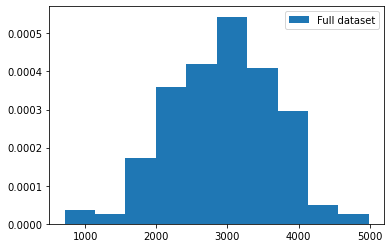

In [18]:
import matplotlib.pyplot as plt
import numpy as np
#plot full dataset's histogram
fig,ax = plt.subplots(1,1)
#plot density histogram with label
ax.hist(df2,density = True,label = 'Full dataset') 
plt.legend()#show labels


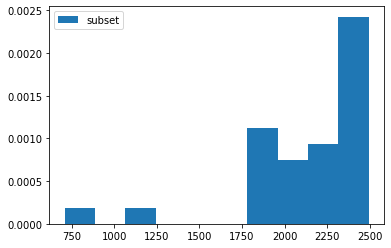

In [19]:
fig,ax = plt.subplots(1,1)
#plot subset's histogram
ax.hist(df3,density = True,label = 'subset')
plt.legend()#show labels

## 1.5
Is a normal distribution a plausible model for birthweight in either of the two datasets? Back up your answer using the previous results. This image of a normal PDF may be useful:


![Normal PDF](bell-curve.jpg)

### _Answer:_  .  
From the codes below, the normal distribution is a plausible model for the BWT in full datasets, but not in the subset. As the graphs below, the first density histogram fits the normal distribution nicely. It is centered at the mean data point(2945), and uses the standard deviation of the dataset as the sigma of normal distribution, the quartile near the mean has much higher density than the ones behind. 
But for the latter one, it is not centered on the mean datapoint, and also doesn't fit with other normal distribution features.

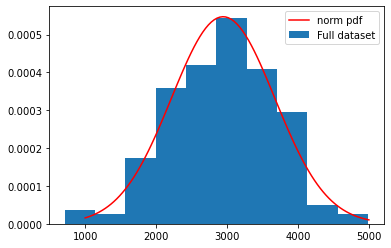

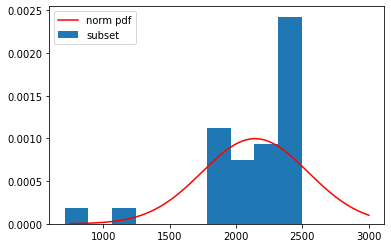

In [13]:
from scipy.stats import norm

fig,ax = plt.subplots(1,1)
#plot full dataset's hostogram
ax.hist(df2,density = True,label = 'Full dataset') 
# use mean, standard deviation as normal distribution's mu and sigma
mu, sig = df2.mean(), df2.std()
x = np.linspace(1000,5000,100) # determine x axis's limit
# plot normal distribution to fit the density histogram
ax.plot(x, norm.pdf(x,mu,sig),'r-',label='norm pdf') 
plt.legend()

fig,ax = plt.subplots(1,1)
#plot subset's hostogram
ax.hist(df3,density = True, label = 'subset') 
# use mean, standard deviation as normal distribution's mu and sigma
mu, sig = df3.mean(), df3.std()
x =np.linspace(750,3000,100) # determine x axis's limit
# plot normal distribution to fit the density histogram
ax.plot(x, norm.pdf(x,mu,sig),'r-',label='norm pdf')
plt.legend()


# Problem 2
In this exercise, we will proceed in steps to perform rejection sampling of a [beta random variable](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html) using a [triangular random variable](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.triang.html) as candidate.

## 2.1
Plot an overlay of a beta PDF and a triangular PDF with the following parameters:
- For the beta PDF, a=2, b=2, loc=0, scale=1.
- For the triangular PDF, c=0.50, loc=0, scale=1.

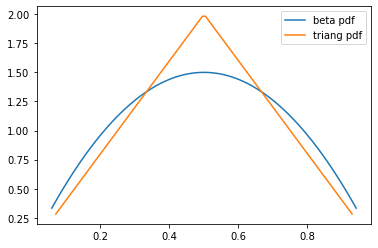

In [193]:
from scipy.stats import beta,triang
import numpy as np

fig, ax = plt.subplots(1, 1)
x = np.linspace(beta.ppf(0.01, a=2, b=2),
                beta.ppf(0.99, a=2, b=2), 100) # define the range of x
# plot beta pdf with given parameters
ax.plot(x, beta.pdf(x, a=2, b=2, loc=0, scale=1),label='beta pdf') 
x = np.linspace(triang.ppf(0.01, c = 0.50), # define the range of x
                triang.ppf(0.99, c = 0.50), 100)
# plot triangular pdf with given parameters
ax.plot(x, triang.pdf(x, c = 0.50,loc=0, scale=1), label='triang pdf')
plt.legend()

## 2.2
We will perform 10,000 trials of the rejection sampling procedure. Simulate and store 10,000 random variables distributed as $\text{Uniform}[0,1]$ using random state 436. Simulate and store 10,000 triangular random variables from the specified triangular distribution using random state 636.

In [194]:
import random
from scipy.stats import uniform
from scipy.stats import expon

N = 10000
# generate 10000 random variables on Uniform distribution
U1 = uniform.rvs(size=N,random_state=436)

# generate 10000 random variables on triangular distribution
G1 = triang.rvs(c = 0.50,size = N, random_state=636 )


## 2.3
Let $f$ be the beta PDF and $g$ the triangular PDF. Using 1.50 as an estimate of $\sup f/g$, generate samples from the beta distribution by rejection sampling. Store your samples. Print the number of samples you obtain.

In [195]:
from scipy.stats import beta,triang

# use triangular distribution g1 as the candidate distribution
f1 = beta.pdf(x, a=2, b=2, loc=0, scale=1)
g1 = triang.pdf(x, c = 0.50,loc=0, scale=1)
# and beta distribution as the target distribution

c = 1.5 # c is the supress f/g
sample = [] # list to store the obtained samples
# loop for 10000 times, calculate each time to select the samples
for i in range(10000):
    U = U1[i] # variable from Uniform distribustion
    Y = G1[i] # variable from triangular distribution
    ratio =  beta.pdf(x = Y,a=2, b=2, loc=0, scale=1) / triang.pdf(x = Y,c = 0.50,loc=0, scale=1) # target / candidate
    if U <= ratio / c: # when get the sample
        # Append to list of samples.
        sample.append(Y)
    # Form new estimate of supremum.
    c = max(c, ratio)

print(len(sample))

6674


## 2.4
Plot a density histogram of your samples overlaid with the beta and triangular PDFs. Use 100 bins.

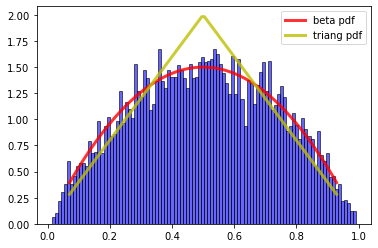

In [200]:
fig, ax = plt.subplots(1, 1)
#plot the beta, triangular distribution PDF's, and the histogram of the samples
ax.plot(x, f1,'r-', lw=3, alpha=0.8, label='beta pdf') # define some properties of the lines and histogram
ax.plot(x,g1,'y-', lw=3, alpha=0.8, label='triang pdf')
ax.hist(sample, alpha = 0.6, color = 'blue',bins = 100, density = True, edgecolor = 'k' )
plt.legend()
plt.show()

# Problem 3

## 3.1
The Epanechnikov kernel is defined by
$$K(u) = \frac{3}{4}\left(1 - u^{2}\right)\qquad\text{for }\lvert u \rvert \leq 1$$
Perform Epanechnikov kernel density estimation on 1,000 simulated samples from a [lognormal distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html) with s=1 and random state 636. Use a bandwidth of 2.0. Plot the density estimate over the support of the lognormal distribution. (You can use 2 times the maximum of your samples as an upper bound for the support.)

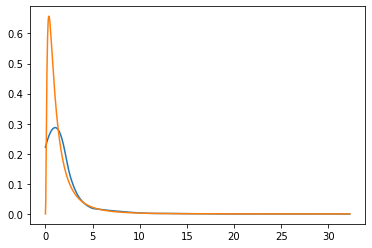

In [178]:
from scipy.stats import lognorm
import sklearn.neighbors

s = 1
# generate 1000 variables from lognoraml distribution
L1 = lognorm.rvs(s,size = 1000, random_state = 636)
#reshape the variables to a 1000 * 1 vector
samples = L1.reshape(1000,1) # L1.T
# compute kde
kde = sklearn.neighbors.KernelDensity(kernel='epanechnikov', bandwidth=2.0).fit(samples)
# define x range
x = np.linspace(0,2*max(L1),1000)
# compute log density from reshaped x values
density = kde.score_samples(x.reshape((1000,1)))
#plot the density graph (expontentional the density values to make it historical)
plt.plot(x,np.exp(density),label = "kde")
#plot the lognormal distribution's PDF
plt.plot(x,lognorm.pdf(x,s = 1), label = 'lognorm')


## 3.2
Test whether the estimate integrates to unity over the support of the lognormal distribution.

In [179]:
x = np.linspace(0,2*max(L1),1000)
print("estimate integrates to: %f " % np.trapz(np.exp(density), x) )

estimate integrates to: 0.821810 


## 3.3
Explain the results of your integration.

### _Answer:_  
From the codes below, when I change the bandwith from 2.0 to 0.3, the two density plots are fitted very well, and we can also get a nice estimate which integrates to almost 1. So I think that maybe the chosen value of bandwith influences the estimate integrates to unity.

estimate integrates to: 0.988721 


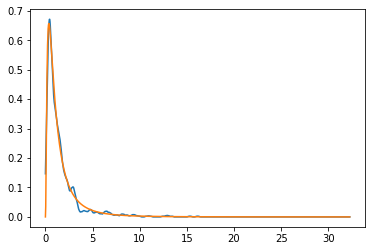

In [180]:
# compute kde
kde = sklearn.neighbors.KernelDensity(kernel='epanechnikov', bandwidth=0.3).fit(samples)
# define x range
x = np.linspace(0,2*max(L1),1000)
# compute log density from reshaped x values
density = kde.score_samples(x.reshape((1000,1)))
#plot the density graph (expontentional the density values to make it historical)
plt.plot(x,np.exp(density),label = "kde")
#plot the lognormal distribution's PDF
plt.plot(x,lognorm.pdf(x,s = 1), label = 'lognorm')

#estimate
print("estimate integrates to: %f " % np.trapz(np.exp(density), x) )

# Problem 4

## 4.1
Below we load the [Boston house prices dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset). We also store the labels of the predictor variables for you.

Our goal will be to predict house price (MEDV) by regression. Split the dataset into a training and test set using 1/3 as the test size and a random state of 553. Use the function [_train_test_split_](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from _sklearn.model_selection_ for this purpose.

In [181]:
# Loading data:

# Import function for loading the 'boston' dataset.
from sklearn.datasets import load_boston
# Load a 'bunch' containing data and descriptions.
boston_bunch = load_boston()
# Extract and store predictor variables.
X = boston_bunch.data
# Extract and store the variable that is the target for prediction.
y = boston_bunch.target
# Extract and store labels of predictor variables.
labels = boston_bunch.feature_names

In [182]:
# Your code:
from sklearn.model_selection import train_test_split
#split the data
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size = 1/3, random_state=553)

## 4.2
Fit three different linear models on the training set by ordinary least squares (OLS): 
- A model using all predictor variables.
- A model using only AGE, NOX, DIS, and RAD as predictor variables.
- A model using all polynomial combinations of degree $\leq 2$ of the original thirteen predictor variables.

In [183]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

# model1 using all variables
#create the linear regression model
regr1 = linear_model.LinearRegression()
# use training data to fit the model
regr1.fit(train_x, train_y)

# model2 using only AGE, NOX, DIS, and RAD as predictor variables.
# select the columns contain only AGE, NOX, DIS, and RAD 
col = [4,6,7,8]
train_x_selected = train_x[:,col] 
#create the linear regression model
regr2 = linear_model.LinearRegression()
# use training data to fit the model
regr2.fit(train_x_selected, train_y)

# model3 using all polynomial combinations of degree≤2 of the original thirteen predictor variables
# max degree 2
# create polynomial features object and transform training datas
pf = PolynomialFeatures(degree=2,include_bias= True) 
xpf = pf.fit_transform(train_x)
#create the linear regression model
regr3 = linear_model.LinearRegression()
# use training data to fit the model
regr3.fit(xpf,train_y)

LinearRegression()

## 4.3
For model assessment, print the following for each of the three models:
- The $R^{2}$ of the predictions on the training set.
- The $R^{2}$ of the predictions on the test set.
- Predicted MEDV for the first five sample points in the test set.
- True MEDV for the first five sample points in the test set.

In [184]:
# Explained variance score: 1 is perfect prediction 

# R2 of the traning and test set
print('Variance score of regression 1 on training set: %.5f' % regr1.score(train_x, train_y))
print('Variance score of regression 1 on test set: %.5f' % regr1.score(test_x, test_y))

print('Variance score of regression 2 on training set: %.5f' % regr2.score(train_x_selected, train_y))
print('Variance score of regression 2 on test set: %.5f' % regr2.score(test_x[:,col], test_y))

# combine the test data
xpf2 = pf.fit_transform(test_x)
print('Variance score of regression 3 on training set: %.5f' % regr3.score(xpf, train_y))
print('Variance score of regression 3 on test set: %.5f' % regr3.score(xpf2, test_y))

# True MEDV values
print('the true MEDV for the first five sample points: %s ' %  test_y[:5])

# first 5 predictions of 3 models
pred1 = regr1.predict(test_x[:5])
print('the predicted MEDV for the first five sample points on model1: %s ' % pred1)

pred2 = regr2.predict(test_x[:5][:,col])
print('the predicted MEDV for the first five sample points on model2: %s ' % pred2)

# combine the test features
test_x_3 = test_x[:5]
xpf3 = pf.fit_transform(test_x_3)
pred3 = regr3.predict(xpf3)
# python version 3.8.8 so the R2 value maybe different from other versions
print('the predicted MEDV for the first five sample points on model3: %s ' % pred3)


Variance score of regression 1 on training set: 0.76670
Variance score of regression 1 on test set: 0.68726
Variance score of regression 2 on training set: 0.28151
Variance score of regression 2 on test set: 0.18524
Variance score of regression 3 on training set: 0.90708
Variance score of regression 3 on test set: 0.75438
the true MEDV for the first five sample points: [24.6  5.6 27.1 21.9 20. ] 
the predicted MEDV for the first five sample points on model1: [24.2652595  12.11746393 27.67012303 24.11419114 21.83525384] 
the predicted MEDV for the first five sample points on model2: [27.88749751 15.41806533 25.36918791 24.09219392 26.37783049] 
the predicted MEDV for the first five sample points on model3: [25.04007125  9.5174551  31.16530728 17.50326896 22.02355313] 


## 4.4
Comment on your results in 4.3, which model do you think is the best? Explain you answer.

### _Answer:_
The third model is the best. Because R2 score of this model is the most closest to 1 value among the three models(0.91 train/0.75 test), and the first five predict MEDV is also very close to the first five true MEDV compared to other two models.

## 4.5
Consider the linear regression model using all original features you built above. Holding all other variables equal, what effect does the model predict that an increase in 0.1 parts per 10 million nitric oxide concentration in a place will have on the median value of of owner-occupied homes in that place? Write code that will return and print the answer.

In [187]:
# get prediction results
pred1 = regr1.predict(test_x)

# make test_x a copy to make changes
new_test_x = test_x.copy()
# add 0.1 to each NOX line 
for i in range(len(new_test_x[:,4])):
    new_test_x[:,4][i] += 0.1
# make new prediction
pred2 = regr1.predict(new_test_x)

# difference between two predictions
diff = pred1[0] - pred2[0]

# difference must be feature NOX's coefficient value times 0.1
print("The difference between two values(0.1*w4): %.2f" % diff)
print("the NOX coefficient of regression(w4): %.2f" % regr1.coef_[4])

The difference between two values(0.1*w4): 1.65
the NOX coefficient of regression(w4): -16.50
